# Big Data by Example

### Analysis over the mean temperature

# Dataset: berkeleyearth
http://berkeleyearth.org/data

In [1]:
install.packages(c('readr', 'data.table', 'dplyr', 'ggplot2'))

Warning message:
“package ‘dyplyr’ is not available (for R version 3.5.1)”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(readr)
library(dplyr)
library(ggplot2)
library(scales)
library(data.table)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘scales’

The following object is masked from ‘package:readr’:

    col_factor


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



In [ ]:
# Using read.csv2()
# Very slow
system.tyme(df_test1 <- read.csv2('../../../../datasets/TemperaturasGlobais.csv'))

In [ ]:
# Using read.table
# Slow
system.time(df_test2 <- read.table('../../../../datasets/TemperaturasGlobais.csv'))

In [3]:
# Using fread()
# Fast
system.time(df <- fread('../../../../datasets/TemperaturasGlobais.csv'))

   user  system elapsed 
  6.336   0.488   3.580 

In [5]:
brazilianCities <- subset(df, Country == 'Brazil')
brazilianCities <- na.omit(brazilianCities)
head(brazilianCities)

dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1832-01-01,25.953,1.570,Alagoinhas,Brazil,12.05S,37.81W
1832-02-01,25.933,2.372,Alagoinhas,Brazil,12.05S,37.81W
1832-03-01,25.968,1.585,Alagoinhas,Brazil,12.05S,37.81W
1832-04-01,25.100,2.175,Alagoinhas,Brazil,12.05S,37.81W
1832-05-01,24.213,1.809,Alagoinhas,Brazil,12.05S,37.81W
1832-06-01,23.844,1.695,Alagoinhas,Brazil,12.05S,37.81W


In [6]:
nrow(df)
nrow(brazilianCities)
dim(brazilianCities)

[1] 8599212

[1] 451645

[1] 451645      7

In [7]:
brazilianCities$dt <- as.POSIXct(brazilianCities$dt, format='%Y-%m-%d')
brazilianCities$Month <- month(brazilianCities$dt)
brazilianCities$Year <- year(brazilianCities$dt)

In [17]:
head(brazilianCities)

dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year
1832-01-01,25.953,1.570,Alagoinhas,Brazil,12.05S,37.81W,1,1832
1832-02-01,25.933,2.372,Alagoinhas,Brazil,12.05S,37.81W,2,1832
1832-03-01,25.968,1.585,Alagoinhas,Brazil,12.05S,37.81W,3,1832
1832-04-01,25.100,2.175,Alagoinhas,Brazil,12.05S,37.81W,4,1832
1832-05-01,24.213,1.809,Alagoinhas,Brazil,12.05S,37.81W,5,1832
1832-06-01,23.844,1.695,Alagoinhas,Brazil,12.05S,37.81W,6,1832


In [23]:
# Jundiai
jundiai <- subset(brazilianCities, City == 'Jundiaí')
jundiai <- subset(jundiai, Year %in% c(1796, 1846, 1896, 1946, 1976, 1996, 2012))
head(jundiai)

dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year
1896-01-01,21.767,0.764,Jundiaí,Brazil,23.31S,46.31W,1,1896
1896-02-01,22.851,1.191,Jundiaí,Brazil,23.31S,46.31W,2,1896
1896-03-01,21.385,0.611,Jundiaí,Brazil,23.31S,46.31W,3,1896
1896-04-01,18.656,0.883,Jundiaí,Brazil,23.31S,46.31W,4,1896
1896-05-01,16.503,0.627,Jundiaí,Brazil,23.31S,46.31W,5,1896
1896-06-01,15.984,0.737,Jundiaí,Brazil,23.31S,46.31W,6,1896


In [22]:
maringa <- subset(brazilianCities, City == 'Maringá')
maringa <- subset(maringa, Year %in% c(1796, 1846, 1896, 1946, 1976, 1996, 2012))
head(maringa)

dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year
1896-01-01,23.671,0.452,Maringá,Brazil,23.31S,51.55W,1,1896
1896-02-01,24.309,1.076,Maringá,Brazil,23.31S,51.55W,2,1896
1896-03-01,23.627,0.633,Maringá,Brazil,23.31S,51.55W,3,1896
1896-04-01,21.106,0.939,Maringá,Brazil,23.31S,51.55W,4,1896
1896-05-01,18.871,1.034,Maringá,Brazil,23.31S,51.55W,5,1896
1896-06-01,17.021,0.872,Maringá,Brazil,23.31S,51.55W,6,1896


In [20]:
fozdoiguacu <- subset(brazilianCities, City == 'Foz Do Iguaçu')
fozdoiguacu <- subset(fozdoiguacu, Year %in% c(1796, 1846, 1896, 1946, 1976, 1996, 2012))
head(fozdoiguacu)

dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year
1896-01-01,25.024,0.437,Foz Do Iguaçu,Brazil,24.92S,54.98W,1,1896
1896-02-01,24.993,1.130,Foz Do Iguaçu,Brazil,24.92S,54.98W,2,1896
1896-03-01,24.314,0.898,Foz Do Iguaçu,Brazil,24.92S,54.98W,3,1896
1896-04-01,21.271,0.855,Foz Do Iguaçu,Brazil,24.92S,54.98W,4,1896
1896-05-01,19.000,1.153,Foz Do Iguaçu,Brazil,24.92S,54.98W,5,1896
1896-06-01,16.014,0.666,Foz Do Iguaçu,Brazil,24.92S,54.98W,6,1896


Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in plot.window(...): need finite 'ylim' values


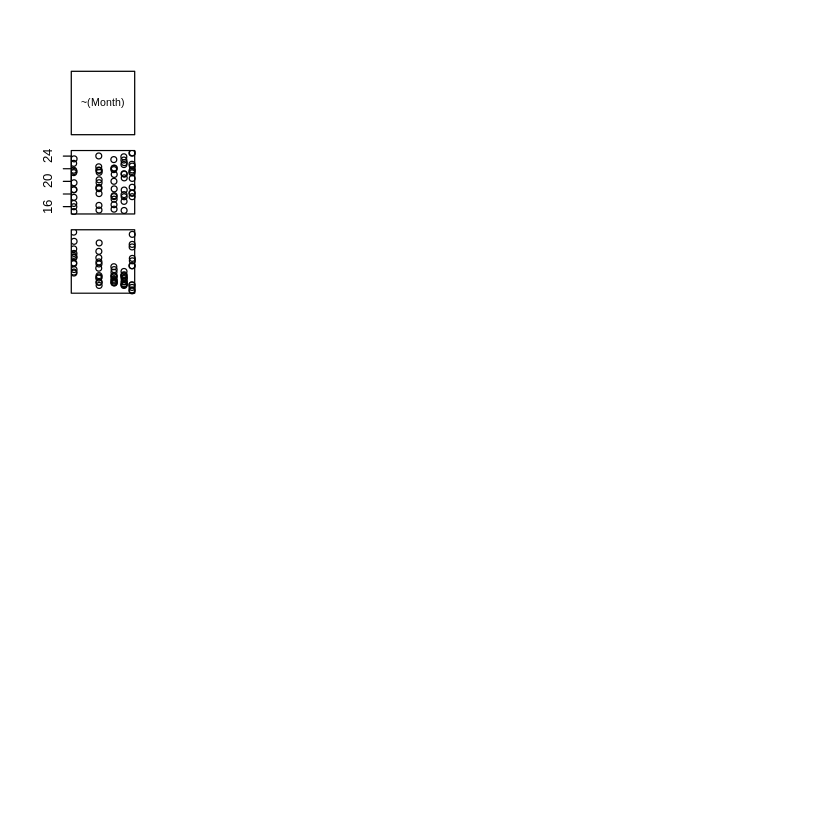

In [33]:
p_jdi <- plot(jundiai, aes(x = (Month), y = AverageTemperature, color = as.factor(Year))) +
geo_smooth(se = F, fill = NA, size = 2) +
theme_light(base_size = 20) +
xlab("Month") +
ylab("Mean temperature") +
scale_color_discrete("") +
ggtitle("Mean temperature in Jundiaí for years") +
theme(plot.title = element_text(size = 18))

Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in plot.window(...): need finite 'ylim' values


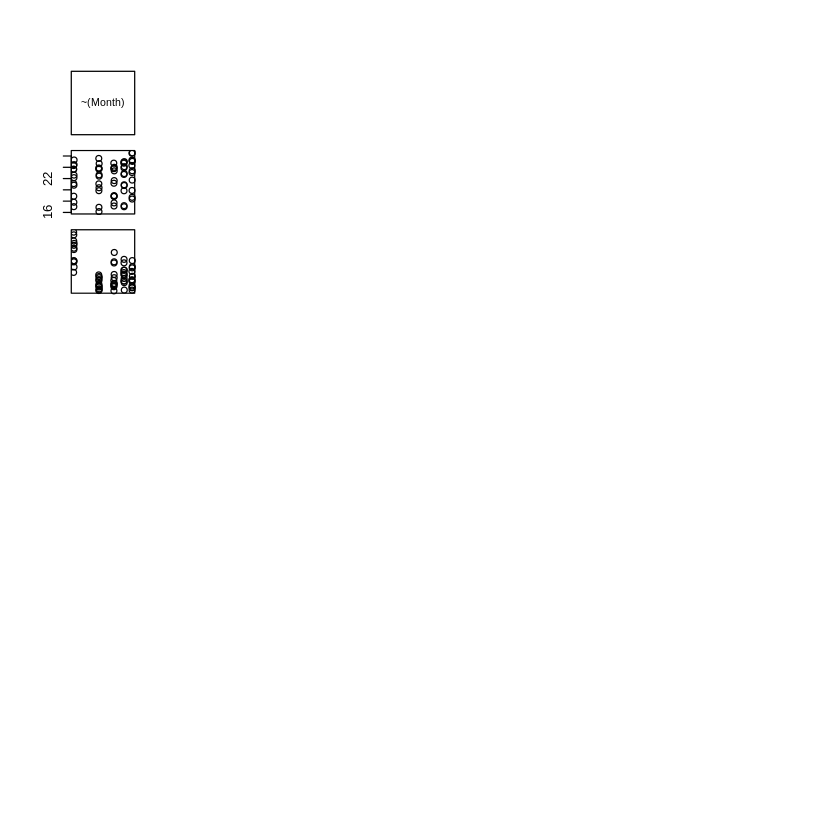

In [26]:
p_mga <- plot(maringa, aes(x = (Month), y = AverageTemperature, color = as.factor(Year))) +
geo_smooth(se = F, fill = NA, size = 2) +
theme_light(base_size = 20) +
xlab("Month") +
ylab("Mean temperature") +
scale_color_discrete("") +
ggtitle("Mean temperature in Maringá for years") +
theme(plot.title = element_text(size = 18))

Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in plot.window(...): need finite 'ylim' values


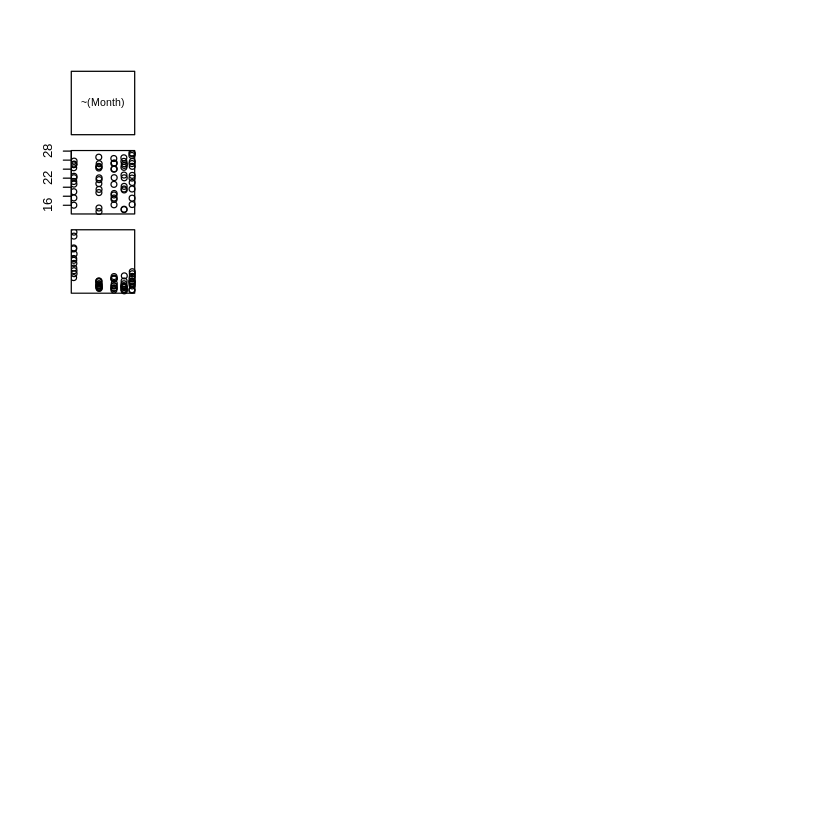

In [27]:
p_foz <- plot(fozdoiguacu, aes(x = (Month), y = AverageTemperature, color = as.factor(Year))) +
geo_smooth(se = F, fill = NA, size = 2) +
theme_light(base_size = 20) +
xlab("Month") +
ylab("Mean temperature") +
scale_color_discrete("") +
ggtitle("Mean temperature in Foz do Iguaçu for years") +
theme(plot.title = element_text(size = 18))

In [34]:
p_jdi

ERROR: Error in eval(expr, envir, enclos): object 'p_jdi' not found
